<a href="https://colab.research.google.com/github/manvendra-07/DL-Lab/blob/main/Week%20%207/200968146_DL_Week_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

In [5]:
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [8]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")
valid = pd.read_csv("Valid.csv")
train.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [9]:
X_train, X_test, X_valid = train['text'], test['text'], valid['text']
Y_train, Y_test, Y_valid = train['label'], test['label'], valid['label']


- **Using the Regular Expression (re) library, replace html tags with spaces and remove emojis**

In [10]:
stop_words = stopwords.words('english')
def preprocess(text):
    text=re.sub('<[^>]*>','', text)
    emoji=re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text=re.sub('[\W]+',' ',text.lower()) +\
                ' '.join(emoji).replace('-','')

    text = text.lower()
    text = [w for w in text.split(' ') if w not in stop_words]
    text = [WordNetLemmatizer().lemmatize(token) for token in text]
    text = [WordNetLemmatizer().lemmatize(token,pos='v') for token in text]
    text = " ".join(text)
    return text

In [11]:
X_train = X_train.apply(lambda x: preprocess(x))
X_test = X_test.apply(lambda x: preprocess(x))
X_valid = X_valid.apply(lambda x: preprocess(x))

In [12]:
X_train.head()

0    grow b 1965 watch love thunderbird mate school...
1    put movie dvd player sit coke chip expectation...
2    people know particular time past like feel nee...
3    even though great interest biblical movie bore...
4    im die hard dad army fan nothing ever change g...
Name: text, dtype: object

In [23]:
def visualise_train(history):
  sns.set_style("darkgrid")
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(1, len(acc) + 1)

  #Train and validation accuracy
  plt.plot(epochs, acc, 'b', label='Training accurarcy')
  plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
  plt.xlabel('Epoch #')
  plt.ylabel('accuracy')
  plt.title('Training and Validation accurarcy')
  plt.legend()

  #Train and validation loss
  plt.figure()
  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.xlabel('Epoch #')
  plt.ylabel('loss')
  plt.title('Training and Validation loss')
  plt.legend()

  plt.show()

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#Tokenize the sentences
tokenizer = Tokenizer()

#preparing vocabulary
tokenizer.fit_on_texts(X_train)

#converting text into integer sequences
X_train = tokenizer.texts_to_sequences(X_train)
X_valid = tokenizer.texts_to_sequences(X_valid)
X_test = tokenizer.texts_to_sequences(X_test)

#padding to prepare sequences of same length
X_train = pad_sequences(X_train, maxlen=120)
X_valid = pad_sequences(X_valid, maxlen=120)
X_test = pad_sequences(X_test, maxlen=120)

In [14]:
size_of_vocabulary = len(tokenizer.word_index)+1
print(size_of_vocabulary)

76139


In [25]:
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense, Embedding, Dropout, Bidirectional, GlobalMaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

def LSTM_Model():
  model = tf.keras.Sequential([
      Embedding(size_of_vocabulary, 128, input_length = 120),
      LSTM(64, return_sequences=True, dropout=0.6),
      LSTM(64, return_sequences=True, dropout=0.4),
      LSTM(64, return_sequences=True, dropout=0.6),
      LSTM(64, return_sequences=True, dropout=0.4),
      LSTM(64, return_sequences=True, dropout=0.6),
      LSTM(64, return_sequences=True, dropout=0.4),
      LSTM(64, return_sequences=True, dropout=0.6),
      LSTM(64, return_sequences=True, dropout=0.4),
      LSTM(64, return_sequences=True, dropout=0.6),
      LSTM(64, return_sequences=True, dropout=0.4),
      LSTM(64, return_sequences=True, dropout=0.6),
      LSTM(64, return_sequences=True, dropout=0.4),
      LSTM(64, return_sequences=True, dropout=0.6),
      LSTM(64, return_sequences=True, dropout=0.4),
      LSTM(64, return_sequences=True, dropout=0.6),
      Dense(1, activation='sigmoid')
  ])
  model.summary()
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

  return model

In [28]:
lstm = LSTM_Model()
lstm_history = lstm.fit(X_train, Y_train, batch_size = 256, epochs = 4,validation_data = (X_valid, Y_valid), verbose = 1)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 120, 128)          9745792   
                                                                 
 lstm_30 (LSTM)              (None, 120, 64)           49408     
                                                                 
 lstm_31 (LSTM)              (None, 120, 64)           33024     
                                                                 
 lstm_32 (LSTM)              (None, 120, 64)           33024     
                                                                 
 lstm_33 (LSTM)              (None, 120, 64)           33024     
                                                                 
 lstm_34 (LSTM)              (None, 120, 64)           33024     
                                                                 
 lstm_35 (LSTM)              (None, 120, 64)          

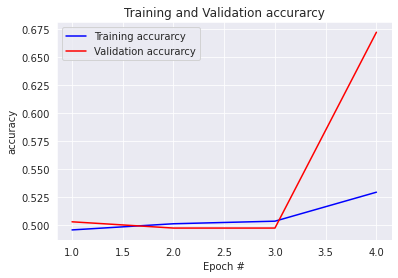

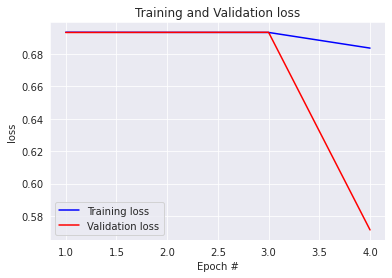

In [29]:
visualise_train(lstm_history)

In [30]:
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense, Embedding, Dropout, Bidirectional, GlobalMaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

def RNN_Model():
  model = tf.keras.Sequential([
      Embedding(size_of_vocabulary,128,input_length=120),
      Bidirectional(SimpleRNN(64, return_sequences= True,dropout=0.2)),
      Bidirectional(SimpleRNN(64, return_sequences= True,dropout=0.2)),
      Bidirectional(SimpleRNN(64, return_sequences= True,dropout=0.2)),
      Bidirectional(SimpleRNN(64, return_sequences= True,dropout=0.2)),
      Bidirectional(SimpleRNN(64, return_sequences= True,dropout=0.2)),
      Bidirectional(SimpleRNN(64, return_sequences= True,dropout=0.2)),
      Bidirectional(SimpleRNN(64, return_sequences= True,dropout=0.2)),
      Bidirectional(SimpleRNN(64, return_sequences= True,dropout=0.2)),
      Bidirectional(SimpleRNN(64, return_sequences= True,dropout=0.2)),
      Bidirectional(SimpleRNN(64, return_sequences= True,dropout=0.2)),
      Bidirectional(SimpleRNN(64, return_sequences= True,dropout=0.2)),
      Bidirectional(SimpleRNN(64, return_sequences= True,dropout=0.2)),
      Bidirectional(SimpleRNN(64, return_sequences= True,dropout=0.2)),
      Bidirectional(SimpleRNN(64, return_sequences= True,dropout=0.2)),
      Bidirectional(SimpleRNN(64, return_sequences= True,dropout=0.2)),
      Bidirectional(SimpleRNN(64, return_sequences= True,dropout=0.2)),
      Bidirectional(SimpleRNN(64, return_sequences= True,dropout=0.2)),
      Bidirectional(SimpleRNN(64, return_sequences= True,dropout=0.2)),
      Bidirectional(SimpleRNN(64, return_sequences= True,dropout=0.2)),
      Dense(1, activation='sigmoid')
  ])

  model.summary()
  model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

  return model

rnn = RNN_Model()

In [ ]:
rnn_history = rnn.fit(X_train, Y_train, batch_size = 256, epochs = 4, validation_data = (X_valid, Y_valid), verbose = 1)

Epoch 1/4
157/157 [==============================] - 851s 5s/step - loss: 0.6986 - accuracy: 0.5000 - val_loss: 0.7032 - val_accuracy: 0.4972
Epoch 2/4
101/157 [==================>...........] - ETA: 5:05 - loss: 0.6959 - accuracy: 0.4998

In [ ]:
visualise_train(rnn_history)